In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import plotly.express as px

In [2]:
df1 = pd.read_csv("IPL.csv/matches.csv")
df2 = pd.read_csv("IPL.csv/deliveries.csv")

# Copy the original data, work on it, and start analyzing the data. Then, create the following trend based on it.

In [3]:
# Make a Copy of Original data
clean_data1 = df1.copy()
clean_data2 = df2.copy()

In [10]:
clean_data1.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,umpire1,umpire2
0,335982,2007-08-01,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,Asad Rauf,RE Koertzen
1,335983,2007-08-01,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,MR Benson,SL Shastri
2,335984,2007-08-01,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,Aleem Dar,GA Pratapkumar
3,335985,2007-08-01,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,SJ Davis,DJ Harper
4,335986,2007-08-01,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,BF Bowden,K Hariharan


In [6]:
clean_data2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [7]:
print("INFO of clean_data1:")
clean_data1.info()
print("INFO of clean_data2:")
clean_data2.info()

INFO of clean_data1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object

In [12]:
# Drop column for not uses in analysis
clean_data1.drop(['method', 'super_over'], axis=1, inplace=True, errors='ignore')
clean_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1035 non-null   datetime64[ns]
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1092 non-null   float64

In [11]:
clean_data1['date'] = pd.to_datetime(clean_data1['date'], errors='coerce')
clean_data1['season'] = pd.to_datetime(clean_data1['season'], format='%Y', errors='coerce')
clean_data1['Season_Year'] = clean_data1['season'].dt.year
print(clean_data1[['date', 'season']].isna().sum())

date       0
season    60
dtype: int64


In [9]:
# Remove extra spaces from column names
clean_data1.columns = clean_data1.columns.str.strip()
clean_data2.columns = clean_data2.columns.str.strip()

In [17]:
#Remove the null values from the 'Season_year' row
clean_data1 = clean_data1.dropna(subset=['Season_Year'])

# Now let's analyze the trend of Toss willingness and their choices.

In [18]:
# ==========================
# PART 1: Toss Winners per Season (Plotly)
# ==========================

# Group data
toss_wins = clean_data1.groupby(['Season_Year', 'toss_winner']).size().reset_index(name='toss_win_count')

# Loop through each season and show separate interactive charts
for season in sorted(clean_data1['Season_Year'].unique()):
    season_data = toss_wins[toss_wins['Season_Year'] == season]

    fig = px.bar(
        season_data,
        x='toss_winner',
        y='toss_win_count',
        color='toss_winner',
        color_discrete_sequence=px.colors.sequential.Viridis,
        title=f"Toss Wins per Team - Season {season}",
        text='toss_win_count'
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(
        showlegend=False,
        xaxis_tickangle=45,
        yaxis_title='Number of Toss Wins',
        xaxis_title='Team'
    )
    fig.show()

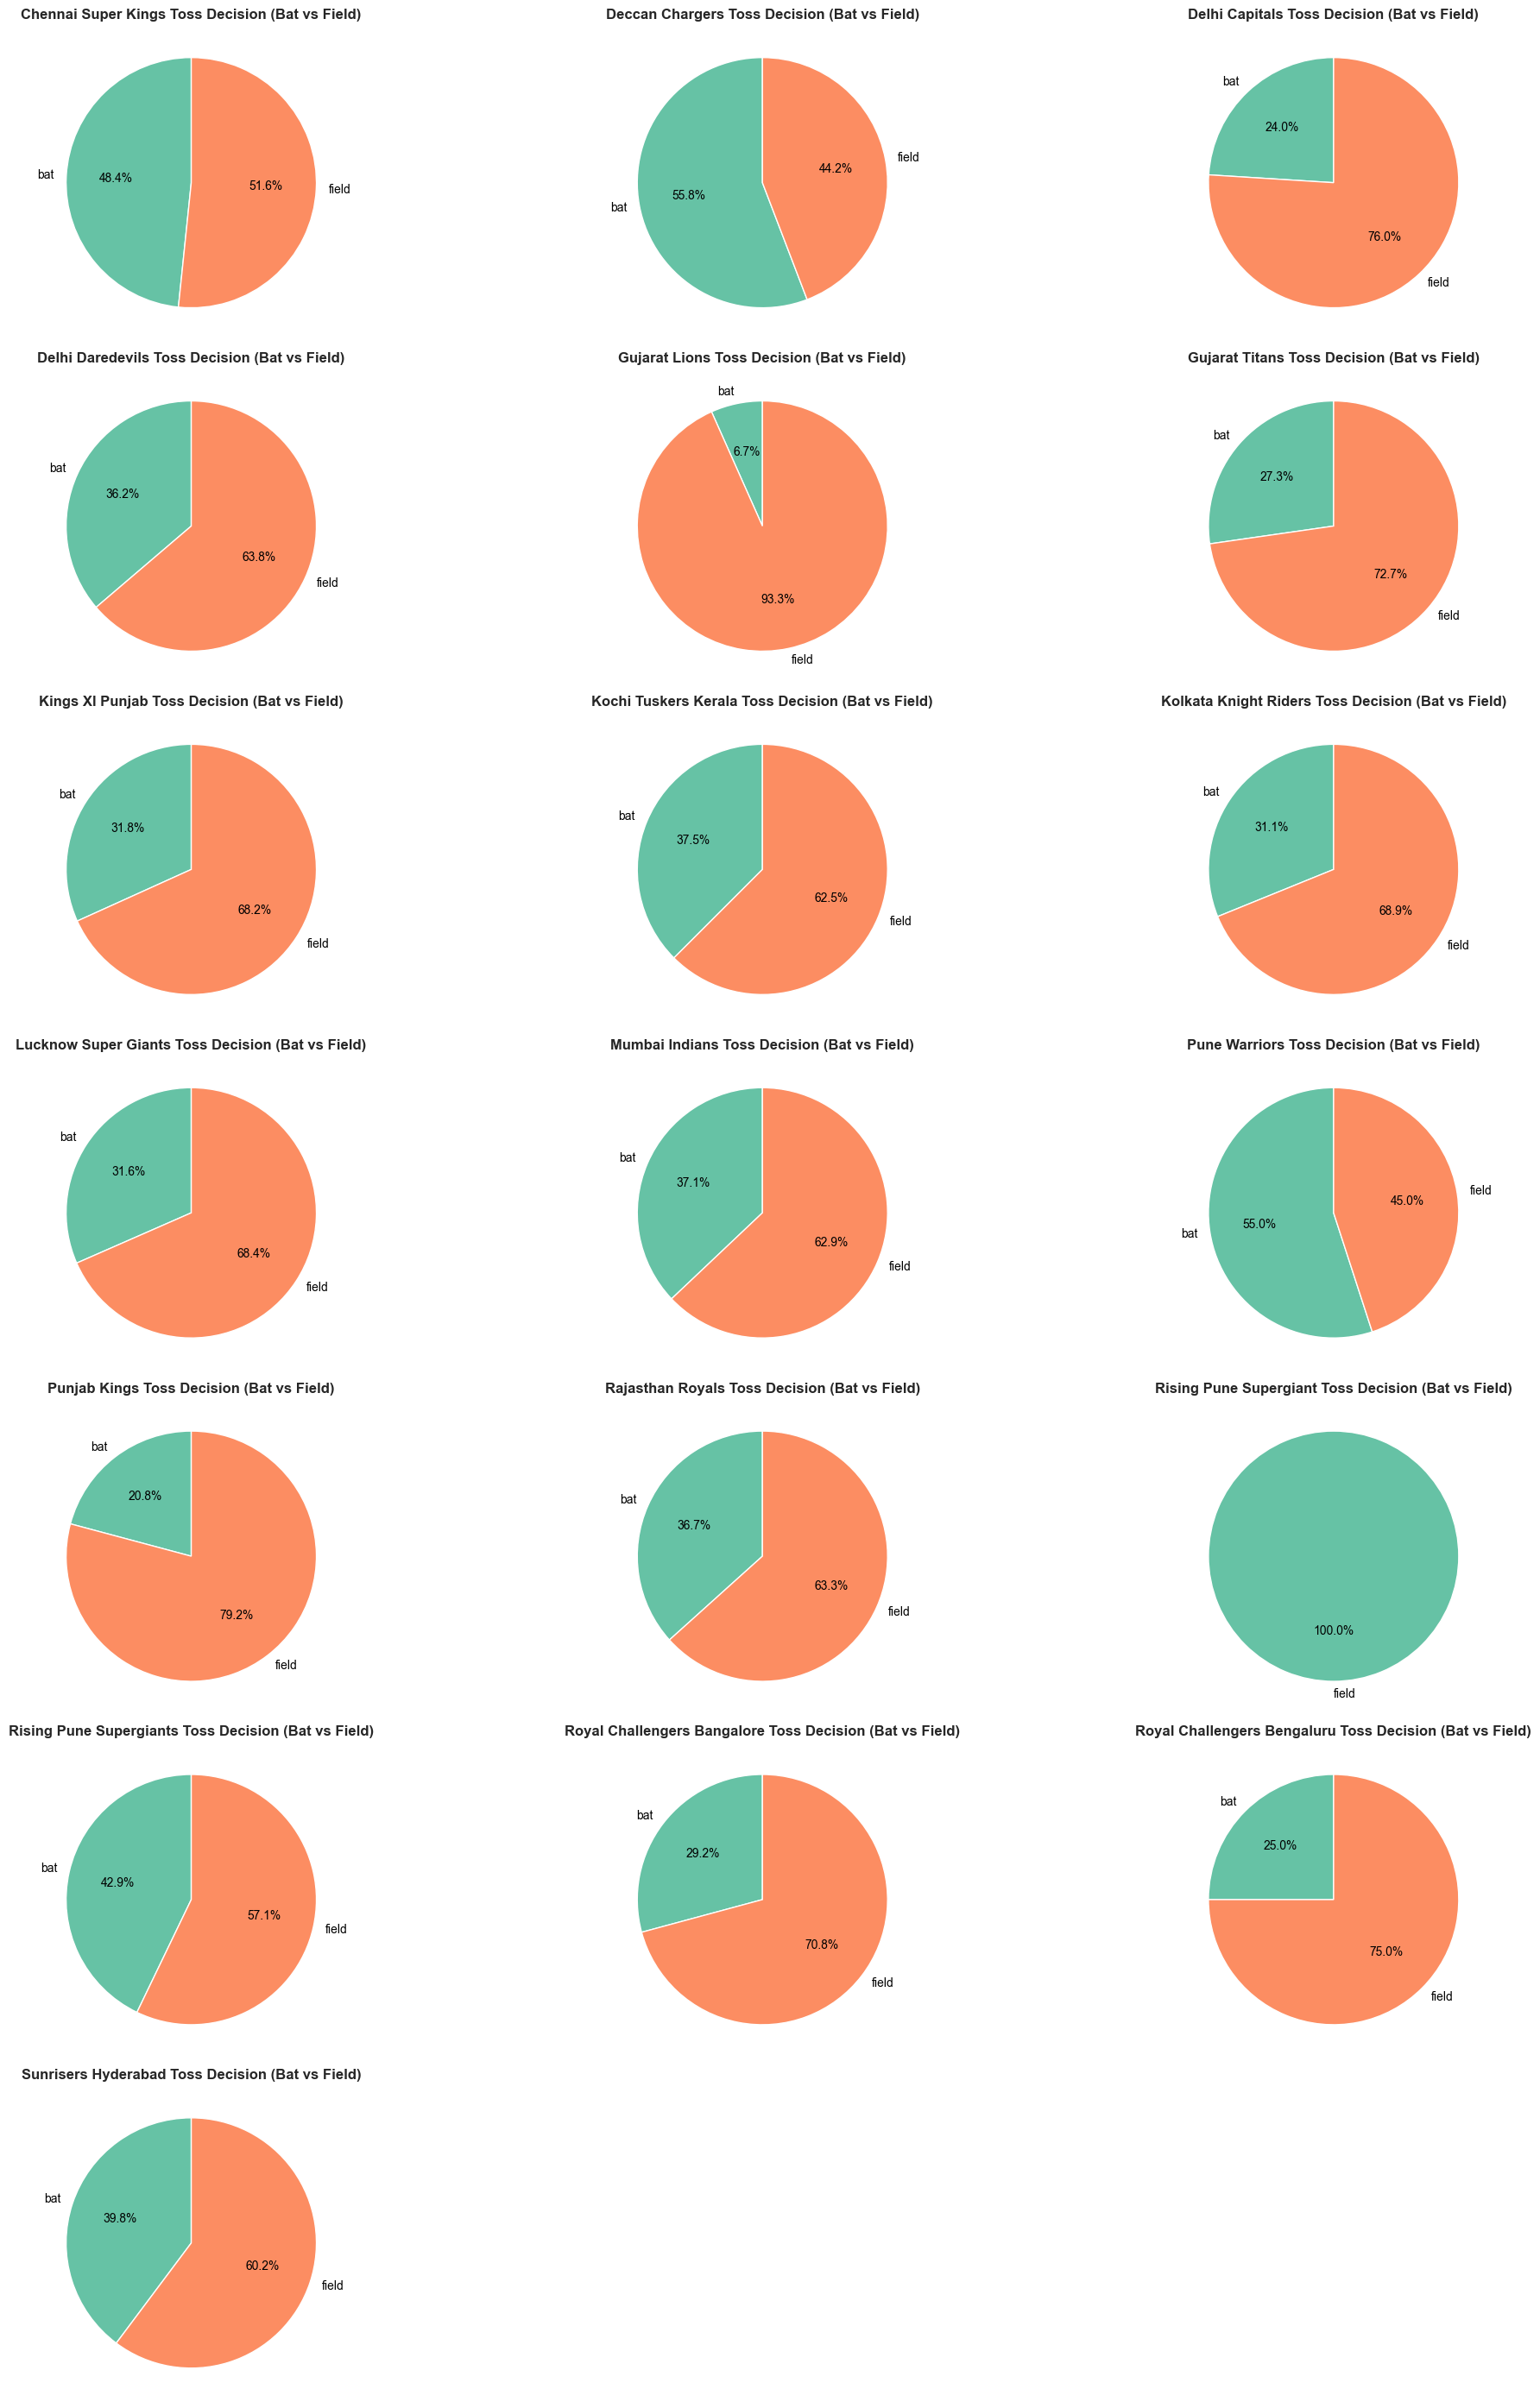

In [21]:
# ==========================
# PART 2: Toss Decision Trends per Team
# ==========================

toss_decision = clean_data1.groupby(['toss_winner', 'toss_decision']).size().reset_index(name='count')
teams = toss_decision['toss_winner'].unique()
num_teams = len(teams)

cols = 3
rows = math.ceil(num_teams / cols)

plt.figure(figsize=(20, rows * 4))
for i, team in enumerate(teams, 1):
    plt.subplot(rows, cols, i)
    team_data = toss_decision[toss_decision['toss_winner'] == team]
    labels = team_data['toss_decision']
    sizes = team_data['count']
    colors = sns.color_palette('Set2', len(labels))

    # Create pie chart
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 10, 'color': 'black'}
    )

    plt.title(f"{team} Toss Decision (Bat vs Field)", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
clean_data1['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [14]:
# Count matches per city
#plotly
x=clean_data1['city'].value_counts().index
y=clean_data1['city'].value_counts().values

city_data = pd.DataFrame({'City':x,
                  'Matches played in the city' :y })
fig = px.bar(city_data,
             x='City',
             y='Matches played in the city',
             color='City',
             text='Matches played in the city',
             title='City v/s No of Matches Played at that City'
            )
fig.show()

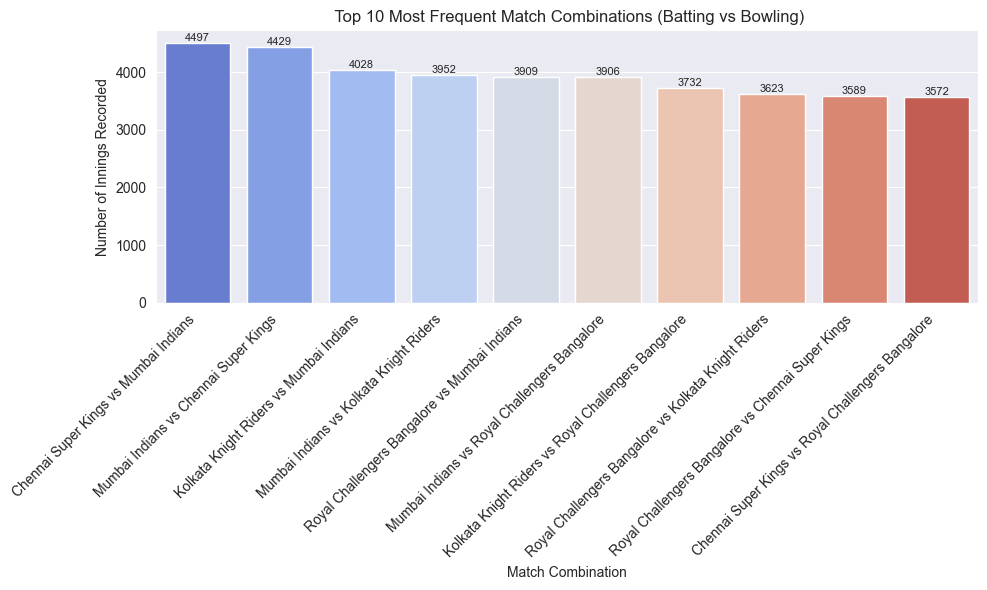

In [21]:
clean_data2["Inning_Match"] = clean_data2["batting_team"] + " vs " + clean_data2["bowling_team"]

# Top 10 combinations
top_matches = clean_data2["Inning_Match"].value_counts().head(10).reset_index()
top_matches.columns = ["Inning_Match", "count"]

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="Inning_Match",
    y="count",
    data=top_matches,
    hue="Inning_Match",
    palette="coolwarm",
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.title(" Top 10 Most Frequent Match Combinations (Batting vs Bowling)")
plt.xlabel("Match Combination")
plt.ylabel("Number of Innings Recorded")
plt.tight_layout()
plt.show()

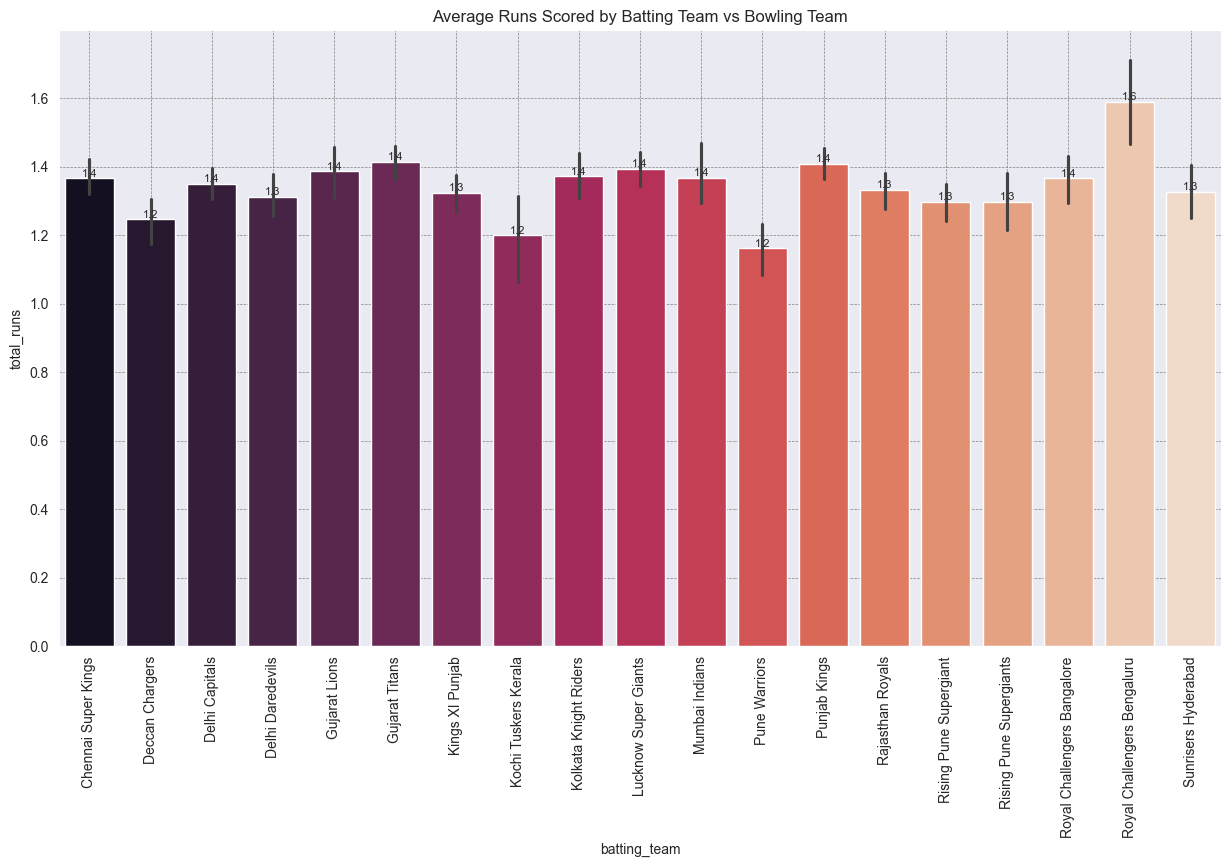

In [22]:
team_runs = clean_data2.groupby(["batting_team", "bowling_team"])["total_runs"].mean().reset_index()

plt.figure(figsize=(15, 8))
ax = sns.barplot(
    x="batting_team",
    y="total_runs",
    data=team_runs,
    hue="batting_team",
    palette="rocket",
    legend=False
)

plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=8)
plt.title("Average Runs Scored by Batting Team vs Bowling Team")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# ==========================
# Top Run Scorers per Season
# ==========================
